In [14]:
import  skimage
from skimage.filters import try_all_threshold

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

In [2]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 12), sharex=True,sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [9]:
img = skimage.io.imread("../data/raw/test.jpg", as_gray=True)

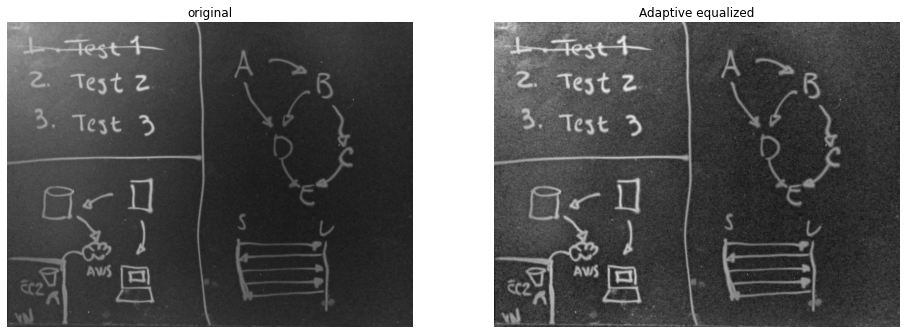

In [10]:
from skimage import exposure
# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(img)
image_adapteq = exposure.exposure.rescale_intensity(image_adapteq, out_range=(0, 1))
# Show original and result
plot_comparison(img, image_adapteq, 'Adaptive equalized')

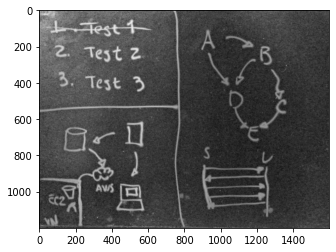

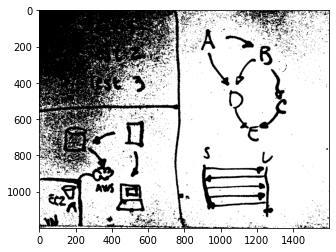

In [11]:
thresh = 0.3
binary = (image_adapteq <= thresh)

# Show the original and inverted thresholded
plt.imshow(image_adapteq, cmap="gray")
plt.show()

plt.imshow(binary, cmap="gray")
plt.show()

/tmp/ipykernel_73158/2184628919.py:15: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  binary_local = denoise_bilateral(binary_local, sigma_color=0.4, sigma_spatial=5, multichannel=False)


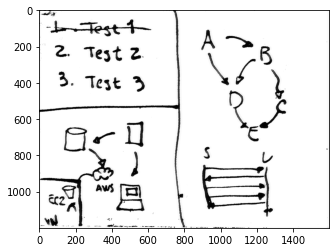

In [38]:
# img = skimage.io.imread("1635717102769-64a67fcb-d6dc-4b59-8bf8-994e745a8ff9_.jpg", as_gray=True)*255
img = image_adapteq*255
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 55 - this number is set each 5. Ex 5, 15, 25, 105, 55, 2005 ... 
block_size = 255
# Obtain the optimal local thresholding
img = (img-255)*-1
local_thresh = threshold_local(img, block_size, offset=35)
# Apply local thresholding and obtain the binary image
binary_local = img > local_thresh

from skimage.restoration import denoise_bilateral, denoise_wavelet 
binary_local = denoise_bilateral(binary_local, sigma_color=0.4, sigma_spatial=5, multichannel=False)

plt.imshow(binary_local, cmap="gray")
plt.show()

In [39]:
skimage.io.imsave("result.jpg", binary_local) 


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
